[LHR 8-1]

In [1]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'B': [6, 8, np.nan, 10], 'C': [11, 13, np.nan, np.nan]})
df


,B,C
0,6.0,11.0
1,8.0,13.0
2,NaN,NaN
3,10.0,NaN


[LHR 8-2]

In [3]:
df_drop_nan = df.dropna()
df_drop_nan


,B,C
0,6.0,11.0
1,8.0,13.0


[LHR 8-3]

In [4]:
df_0 = df['C'].fillna(0)
print(df_0)


0    11.0
1    13.0
2     0.0
3     0.0
Name: C, dtype: float64


[LHR 8-4]

In [5]:
df_mean = df.fillna(df.mean())
print(df, '\n')
print(df_mean)


      B     C
0   6.0  11.0
1   8.0  13.0
2   NaN   NaN
3  10.0   NaN 

      B     C
0   6.0  11.0
1   8.0  13.0
2   8.0  12.0
3  10.0  12.0


[LHR 8-5]

In [6]:
import pandas as pd

data = [0, 25, 50, 75, 100, 9000]
df = pd.DataFrame(data, columns=['Values'])

q1 = df['Values'].quantile(0.25)
q3 = df['Values'].quantile(0.75)

print('Q1', q1)
print('Q3', q3)

iqr_Value = q3 - q1
print('iqr', iqr_Value)


Q1 31.25
Q3 93.75
iqr 62.5


[LHR 8-6]

In [7]:
upper_V = q3 + 1.5 * iqr_Value
lower_V = q1 - 1.5 * iqr_Value
print(upper_V, '/', lower_V)


187.5 / -62.5


[LHR 8-7]

In [8]:
df_iqr = df[(df['Values'] < upper_V) & (df['Values'] > lower_V)]
df_iqr


,Values
0,0
1,25
2,50
3,75
4,100


[LHR 8-8]

In [9]:
import pandas as pd

data = [0, 25, 50, 75, 100]
df = pd.DataFrame(data, columns=['Values'])

df['Nor'] = (df['Values'] - df['Values'].min()) / (df['Values'].max() - df['Values'].min())
df


,Values,Nor
0,0,0.00
1,25,0.25
2,50,0.50
3,75,0.75
4,100,1.00


[LHR 8-9]

In [12]:
from google.colab import files
uploaded = files.upload()

Saving LHR_대전암반2009.csv to LHR_대전암반2009.csv


[LHR 8-10]

In [13]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (42.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126455 files and direc

[LHR 8-11]

In [15]:
import pandas as pd
import numpy as np
import csv

df = pd.read_csv('LHR_대전암반2009.csv', encoding='UTF-8')
df.head(3)


,관측소,구분,날짜,시간,수온(℃),수위(el.m),EC(㎲/㎝)
0,대전태평,(암반),20090101,0,16.1,44.47,749
1,대전태평,(암반),20090101,1,16.1,44.47,749
2,대전태평,(암반),20090101,2,16.1,44.47,749


[LHR 8-12]

In [16]:
df = df.reset_index(drop=True)
df


,관측소,구분,날짜,시간,수온(℃),수위(el.m),EC(㎲/㎝)
0,대전태평,(암반),20090101,0,16.1,44.47,749
1,대전태평,(암반),20090101,1,16.1,44.47,749
2,대전태평,(암반),20090101,2,16.1,44.47,749
3,대전태평,(암반),20090101,3,16.1,44.47,749
4,대전태평,(암반),20090101,4,16.1,44.47,749
...,...,...,...,...,...,...,...
8619,대전태평,(암반),20091231,19,16.2,44.47,741
8620,대전태평,(암반),20091231,20,16.2,44.47,741
8621,대전태평,(암반),20091231,21,16.2,44.47,741
8622,대전태평,(암반),20091231,22,16.2,44.47,741


[LHR 8-13]

In [17]:
from datetime import datetime, date, time
df['Date'] = pd.to_datetime(df['날짜'], format='%Y%m%d') + pd.to_timedelta(df['시간'].astype(int), unit='h')
df.set_index(df['Date'], inplace=True)
df.head(3)


,관측소,구분,날짜,시간,수온(℃),수위(el.m),EC(㎲/㎝),Date
Date,,,,,,,,
2009-01-01 00:00:00,대전태평,(암반),20090101,0,16.1,44.47,749,2009-01-01 00:00:00
2009-01-01 01:00:00,대전태평,(암반),20090101,1,16.1,44.47,749,2009-01-01 01:00:00
2009-01-01 02:00:00,대전태평,(암반),20090101,2,16.1,44.47,749,2009-01-01 02:00:00


[LHR 8-14]

In [18]:
df.columns = ['관측소', '구분', '날짜', '시간', 'temp', 'level', 'EC', 'Date']
df.head(3)


,관측소,구분,날짜,시간,temp,level,EC,Date
Date,,,,,,,,
2009-01-01 00:00:00,대전태평,(암반),20090101,0,16.1,44.47,749,2009-01-01 00:00:00
2009-01-01 01:00:00,대전태평,(암반),20090101,1,16.1,44.47,749,2009-01-01 01:00:00
2009-01-01 02:00:00,대전태평,(암반),20090101,2,16.1,44.47,749,2009-01-01 02:00:00


[LHR 8-15]

In [19]:
q3_level = df['level'].quantile(q=0.75)
q1_level = df['level'].quantile(q=0.25)
iqr_level = q3_level - q1_level
print(iqr_level)


0.07000000000000028


[LHR 8-16]

In [20]:
upper_level = q3_level + 1.5 * iqr_level
lower_level = q1_level - 1.5 * iqr_level
print(upper_level, '/', lower_level)


44.635000000000005 / 44.355000000000004


[LHR 8-17]

<Axes: xlabel='Date'>

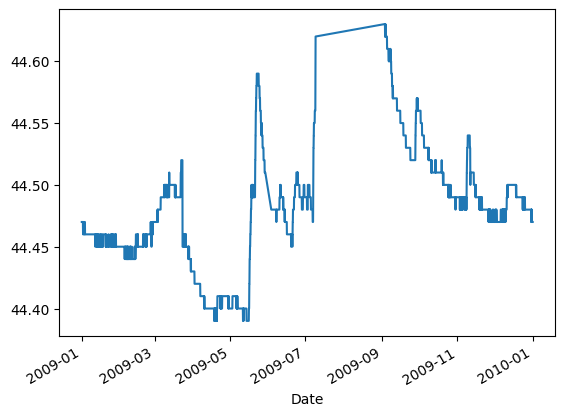

In [21]:
df_iqr_level = df[(df['level'] < upper_level) & (df['level'] > lower_level)]
df_iqr_level['level'].plot()


[LHR 8-18]

In [22]:
q3_ec = df['EC'].quantile(q=0.75)
q1_ec = df['EC'].quantile(q=0.25)
iqr_ec = q3_ec - q1_ec
print('IQR:', iqr_ec)


IQR: 9.0


[LHR 8-19]

In [23]:
upper_ec = q3_ec + iqr_ec * 1.5
lower_ec = q1_ec - iqr_ec * 1.5
print(upper_ec, '/', lower_ec)


758.5 / 722.5


[LHR 8-20]

<Axes: xlabel='Date'>

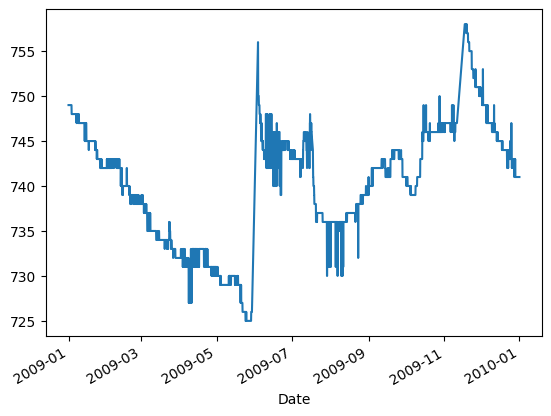

In [24]:
df_iqr_ec = df[(df['EC'] < upper_ec) & (df['EC'] > lower_ec)]
df_iqr_ec['EC'].plot()


[LHR 8-21]

In [25]:
df_iqr_ec.to_csv('LHR_대전지하수_이상치정제.csv', encoding='UTF-8')


[LHR 8-22]

In [26]:
import csv
df_ec = pd.read_csv('LHR_대전지하수_이상치정제.csv')
df_ec.head()


,Date,관측소,구분,날짜,시간,temp,level,EC,Date.1
0,2009-01-01 00:00:00,대전태평,(암반),20090101,0,16.1,44.47,749,2009-01-01 00:00:00
1,2009-01-01 01:00:00,대전태평,(암반),20090101,1,16.1,44.47,749,2009-01-01 01:00:00
2,2009-01-01 02:00:00,대전태평,(암반),20090101,2,16.1,44.47,749,2009-01-01 02:00:00
3,2009-01-01 03:00:00,대전태평,(암반),20090101,3,16.1,44.47,749,2009-01-01 03:00:00
4,2009-01-01 04:00:00,대전태평,(암반),20090101,4,16.1,44.47,749,2009-01-01 04:00:00


[LHR 8-23]

<Axes: >

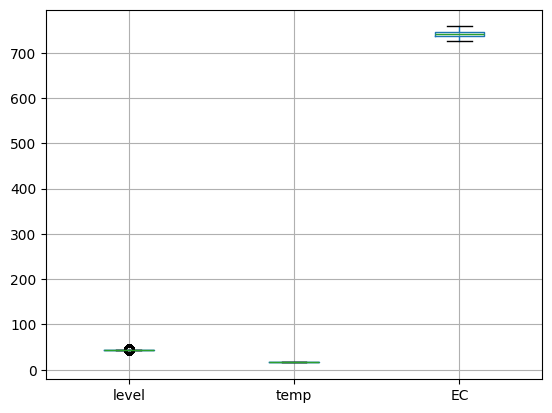

In [27]:
df_subset = df_ec[['level', 'temp', 'EC']]
df_subset.boxplot()


[LHR 8-24]

In [28]:
df_copy1 = df_ec.copy()
df_copy1.head(3)


,Date,관측소,구분,날짜,시간,temp,level,EC,Date.1
0,2009-01-01 00:00:00,대전태평,(암반),20090101,0,16.1,44.47,749,2009-01-01 00:00:00
1,2009-01-01 01:00:00,대전태평,(암반),20090101,1,16.1,44.47,749,2009-01-01 01:00:00
2,2009-01-01 02:00:00,대전태평,(암반),20090101,2,16.1,44.47,749,2009-01-01 02:00:00


[LHR 8-25]

In [29]:
df_copy1['level_minmax'] = (df_copy1['level'] - df_copy1['level'].min()) / (df_copy1['level'].max() - df_copy1['level'].min())
df_copy1.head(3)


,Date,관측소,구분,날짜,시간,temp,level,EC,Date.1,level_minmax
0,2009-01-01 00:00:00,대전태평,(암반),20090101,0,16.1,44.47,749,2009-01-01 00:00:00,0.065041
1,2009-01-01 01:00:00,대전태평,(암반),20090101,1,16.1,44.47,749,2009-01-01 01:00:00,0.065041
2,2009-01-01 02:00:00,대전태평,(암반),20090101,2,16.1,44.47,749,2009-01-01 02:00:00,0.065041


[LHR 8-26]

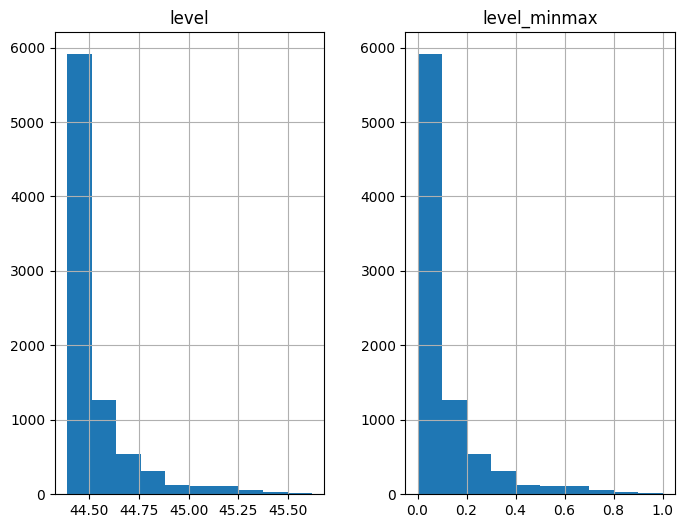

In [30]:
import matplotlib.pyplot as plt

df_level = df_copy1[['level', 'level_minmax']]
df_level.hist(figsize=(8,6))
plt.show()


[LHR 8-27]

In [31]:
df_copy1['temp_minmax'] = (df_copy1['temp'] - df_copy1['temp'].min()) / (df_copy1['temp'].max() - df_copy1['temp'].min())
df_copy1


,Date,관측소,구분,날짜,시간,temp,level,EC,Date.1,level_minmax,temp_minmax
0,2009-01-01 00:00:00,대전태평,(암반),20090101,0,16.1,44.47,749,2009-01-01 00:00:00,0.065041,0.0
1,2009-01-01 01:00:00,대전태평,(암반),20090101,1,16.1,44.47,749,2009-01-01 01:00:00,0.065041,0.0
2,2009-01-01 02:00:00,대전태평,(암반),20090101,2,16.1,44.47,749,2009-01-01 02:00:00,0.065041,0.0
3,2009-01-01 03:00:00,대전태평,(암반),20090101,3,16.1,44.47,749,2009-01-01 03:00:00,0.065041,0.0
4,2009-01-01 04:00:00,대전태평,(암반),20090101,4,16.1,44.47,749,2009-01-01 04:00:00,0.065041,0.0
...,...,...,...,...,...,...,...,...,...,...,...
8462,2009-12-31 19:00:00,대전태평,(암반),20091231,19,16.2,44.47,741,2009-12-31 19:00:00,0.065041,0.5
8463,2009-12-31 20:00:00,대전태평,(암반),20091231,20,16.2,44.47,741,2009-12-31 20:00:00,0.065041,0.5
8464,2009-12-31 21:00:00,대전태평,(암반),20091231,21,16.2,44.47,741,2009-12-31 21:00:00,0.065041,0.5
8465,2009-12-31 22:00:00,대전태평,(암반),20091231,22,16.2,44.47,741,2009-12-31 22:00:00,0.065041,0.5


[LHR 8-28]

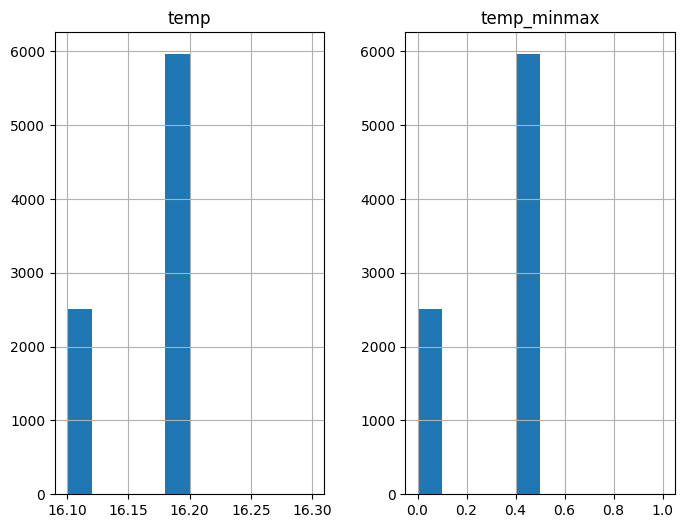

In [32]:
df_temp = df_copy1[['temp', 'temp_minmax']]
df_temp.hist(figsize=(8,6))
plt.show()


[LHR 8-29]

In [33]:
from google.colab import files
uploaded = files.upload()

Saving LHR_titanic.csv to LHR_titanic.csv


[LHR 8-30]

In [35]:
import pandas as pd
import numpy as np

df = pd.read_csv('LHR_titanic.csv', encoding='UTF-8')
df.set_index(df['PassengerId'], inplace=True)
df.shape


(891, 12)

[LHR 8-31]

In [36]:
import pandas as pd
pd.isna(df).sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


[LHR 8-32]

In [37]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Age'].head(7)


,Age
PassengerId,
1,22.000000
2,38.000000
3,26.000000
4,35.000000
5,35.000000
6,29.699118
7,54.000000


[LHR 8-33]

In [38]:
df_drop_nan = df.dropna()
df_drop_nan.shape


(202, 12)

[LHR 8-34]

In [40]:
df_drop_nan.to_csv('LHR_titanic_nomissing.csv', encoding='UTF-8')
